In [202]:
import sys 
sys.path.insert(-1,"../")
from mazeAgentUtils import *

%load_ext autoreload
%autoreload 2

%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [181]:
N=50
xcen = np.linspace(0,5,N+1)[:-1]
xcen += (xcen[1] - xcen[0]) / 2
ycen = np.array([0.1]*N)
centres = np.vstack((xcen,ycen)).T

#Default parameters for MazeAgent 
params = { 

          #Maze params 
          'mazeType'            : 'loop',  #type of maze, define in getMaze() function
          'stateType'           : 'gaussianThreshold', #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
          'movementPolicy'      : 'windowsScreensaver',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'            : 5,          #maze size scaling parameter, metres
          'dt'                  : 0.01,       #simulation time disretisation 
          'dx'                  : 0.01,       #space discretisation (for plotting, movement is continuous)
          'centres'             : centres,       #array of receptive field positions. Overwrites nCells
          'sigma'               : 1,          #basis cell width scale (irrelevant for onehots)
          'doorsClosed'         : False,       #whether doors are opened or closed in multicompartment maze

          #TD params 
          'tau'                 : 4,          #TD decay time, seconds
          'TDdx'                : 0.01,       #rough distance between TD learning updates, metres 
          'alpha'               : 0.01,       #TD learning rate 
          'successorFeatureNorm': 100,        #linear scaling on successor feature definition found to improve learning stability
          'TDreg'               : 0.01,       #L2 regularisation 
          
          #STDP params
          'peakFiringRate'      : 5,          #peak firing rate of a cell (middle of place field, preferred theta phase)
          'tau_STDP_plus'       : 20e-3,      #pre trace decay time
          'tau_STDP_minus'      : 40e-3,      #post trace decay time
          'a_STDP'              : -0.4,       #pre-before-post potentiation factor (post-before-pre = 1) 
          'eta'                 : 0.05,       #STDP learning rate
          'baselineFiringRate'  : 0,          #baseline firing rate for cells 


          #Theta precession params
          'thetaFreq'           : 10,         #theta frequency
          'precessFraction'     : 0.5,        #fraction of 2pi the prefered phase moves through
          'kappa'               : 1,          # von mises spread parameter
          }


agent =  MazeAgent(params)

Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/10000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces
DONE


'../figures/211014/openloop_1807'

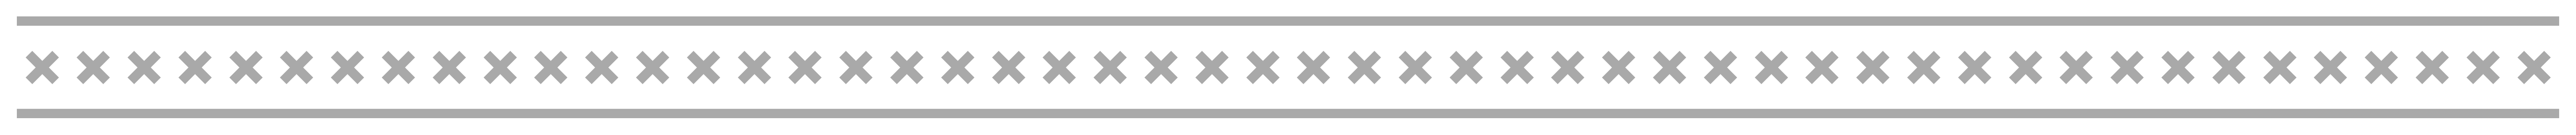

In [184]:
#FIGURE 2A
plotter = Visualiser(agent)
fig, ax = plotter.plotFeatureCells(centresOnly=True, textlabel=False,onepink=True)
saveFigure(fig,'openloop',specialLocation="../figures/paperFigures/figure2/2A.svg")


  0%|          | 0/30000 [00:00<?, ?it/s]

Calculating place and grid cells


(0.7424512395664458,
 0.3986062146057949,
 4.250398805881372,
 2.2622157820491466,
 -0.06993161032399982,
 0.04340652132871284,
 -0.4792643285503631,
 -0.1499999999999999,
 -0.1499999999999999,
 -0.1499999999999999)

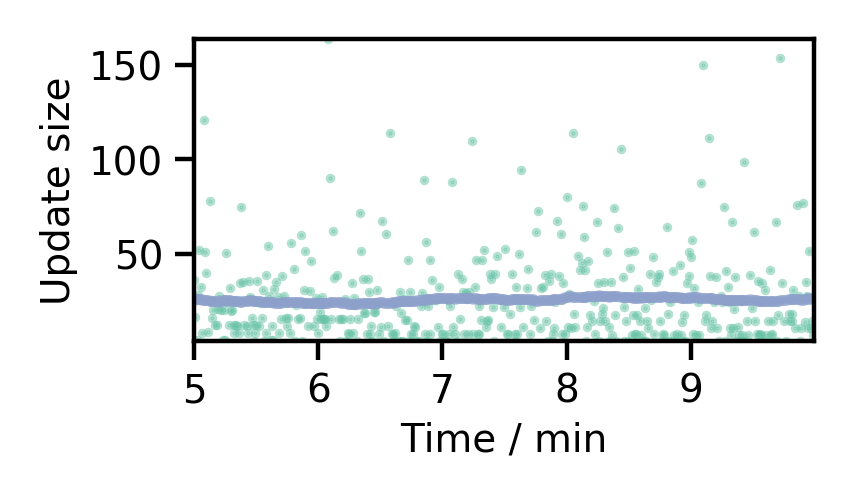

In [185]:
agent.runRat(trainTime=5,saveEvery=0.5)
plotter = Visualiser(agent)
agent.getMetrics()

              R2        SNR        skew        peak 
W             0.74      4.25       -0.07        -0.15 
W (no theta)  0.40      2.26       0.04        -0.15 
M             -         -          -0.48        -0.15 


'../figures/211014/Mvarerr_1813'

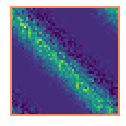

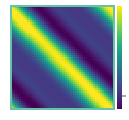

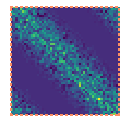

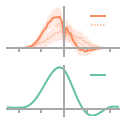

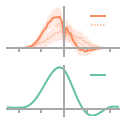

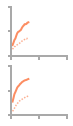

In [203]:
# #FIGURE 2B
fig, ax = plotter.plotM(whichM='W',colorbar=False,time=30)
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W',specialLocation='../figures/paperFigures/figure2/2B.svg')

#FIGURE 2C
fig, ax, cb, cax = plotter.plotM(whichM='M')
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C0')
    spine.set_linewidth(2)
cb.set_ticks([0])
cb.set_ticklabels([""])
cax.tick_params(color='darkgrey',width=2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'M',specialLocation='../figures/paperFigures/figure2/2C.svg')

#FIGURE 2C
fig, ax = plotter.plotM(whichM='W_notheta',colorbar=False,time=30)
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
    spine.set_linestyle((0,(0.5,2)))
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W_notheta')

#FIGURE 2D
fig, ax = plotter.plotMAveraged(time=10)
saveFigure(fig,'Mav',specialLocation='../figures/paperFigures/figure2/2D.svg')

fig, ax = plotter.plotMAveraged(time=30)
saveFigure(fig,'Mav',specialLocation='../figures/paperFigures/figure2/2D.svg')

#FIGURE 2E
fig, ax = plotter.plotVarianceAndError()
saveFigure(fig,'Mvarerr',specialLocation='../figures/paperFigures/figure2/2E.svg')


In [6]:
N=50
xcen = np.linspace(0,5,N+1)[:-1]
xcen += (xcen[1] - xcen[0]) / 2
ycen = np.array([0.1]*N)
centres = np.vstack((xcen,ycen)).T

#Default parameters for MazeAgent 
params2 = { 

          #Maze params 
          'mazeType'            : 'loop',  #type of maze, define in getMaze() function
          'stateType'           : 'gaussianThreshold', #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
          'movementPolicy'      : 'windowsScreensaver',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'            : 5,          #maze size scaling parameter, metres
          'dt'                  : 0.005,       #simulation time disretisation 
          'dx'                  : 0.01,       #space discretisation (for plotting, movement is continuous)
          'centres'             : centres,       #array of receptive field positions. Overwrites nCells
          'sigma'               : 1,          #basis cell width scale (irrelevant for onehots)
          'doorsClosed'         : True,       #whether doors are opened or closed in multicompartment maze

          #TD params 
          'tau'                 : 4,          #TD decay time, seconds
          'TDdx'                : 0.01,       #rough distance between TD learning updates, metres 
          'alpha'               : 0.01,       #TD learning rate 
          'successorFeatureNorm': 100,        #linear scaling on successor feature definition found to improve learning stability
          'TDreg'               : 0.01,       #L2 regularisation 
          
          #STDP params
          'peakFiringRate'      : 5,          #peak firing rate of a cell (middle of place field, preferred theta phase)
          'tau_STDP_plus'       : 20e-3,      #pre trace decay time
          'tau_STDP_minus'      : 40e-3,      #post trace decay time
          'a_STDP'              : -0.4,       #pre-before-post potentiation factor (post-before-pre = 1) 
          'eta'                 : 0.05,       #STDP learning rate
          'baselineFiringRate'  : 0,          #baseline firing rate for cells 


          #Theta precession params
          'thetaFreq'           : 10,         #theta frequency
          'precessFraction'     : 0.5,        #fraction of 2pi the prefered phase moves through
          'kappa'               : 1,          # von mises spread parameter
          }



agent2 =  MazeAgent(params2)

Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/10000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces
DONE


'../figures/211013/openloop_0028'

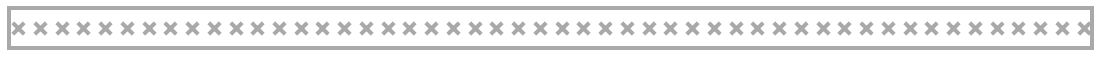

In [7]:
#FIGURE 2F
plotter2 = Visualiser(agent2)
fig, ax = plotter2.plotFeatureCells(centresOnly=True, textlabel=False,onepink=False)
saveFigure(fig,'openloop',specialLocation="../figures/paperFigures/figure2/2F.svg")


  0%|          | 0/360000 [00:00<?, ?it/s]

Calculating place and grid cells


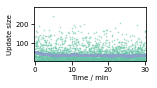

In [8]:
agent2.runRat(trainTime=30,saveEvery=0.5)
plotter2 = Visualiser(agent2)

W skew             =  -0.03
W (no theta) skew  =   -0.00
M skew             =  0.00


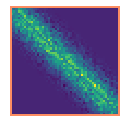

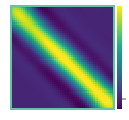

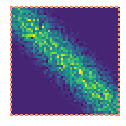

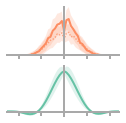

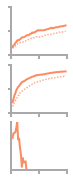

In [9]:
#FIGURE 2G
fig, ax = plotter2.plotM(whichM='W',colorbar=False,time=30)
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W',specialLocation='../figures/paperFigures/figure2/2G.svg')

#FIGURE 2H
fig, ax, cb, cax = plotter2.plotM()
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C0')
    spine.set_linewidth(2)
cb.set_ticks([0])
cb.set_ticklabels([""])
cax.tick_params(color='darkgrey',width=2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'M',specialLocation='../figures/paperFigures/figure2/2H.svg')

fig, ax = plotter2.plotM(whichM='W_notheta',colorbar=False)
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
    spine.set_linestyle((0,(0.5,2)))
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W_notheta')


#FIGURE 2IJ
fig, ax = plotter2.plotMAveraged()
ax[0].get_legend().set_visible(False) 
saveFigure(fig,'Mav',specialLocation='../figures/paperFigures/figure2/2I.svg')

fig, ax = plotter2.plotVarianceAndError()
saveFigure(fig,'Mvarerr',specialLocation='../figures/paperFigures/figure2/2J.svg')

_,_,_,_,skewW,skewWnotheta,skewM = agent2.getMetrics(time=30*60)
print("W skew             =  %.2f" %skewW)
print("W (no theta) skew  =   %.2f" %skewWnotheta)
print("M skew             =  %.2f" %skewM)


In [10]:
#Default parameters for MazeAgent 
N = 200 
roomSize = 2.5
n = int(np.sqrt(N / 2))
delta = roomSize / n
x = np.arange(0,2.5,delta) + delta/2
y = np.arange(0,2.5,delta) + delta/2
xy = np.meshgrid(x,y)
centresL = []
for i in range(len(x)):
    for j in range(len(y)):
        centresL += [[x[i],y[j]]]
centresL = np.array(centresL)
centresR = centresL + np.array([2.5,0])
centres = np.vstack([centresL,centresR])
delta=0.45*delta
centres += np.random.uniform(-0.8*delta,0.8*delta,size=centres.shape)

params3 = { 

          #Maze params 
          'mazeType'            : 'twoRooms',  #type of maze, define in getMaze() function
          'stateType'           : 'gaussianThreshold', #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
          'movementPolicy'      : 'raudies',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'            : roomSize,          #maze size scaling parameter, metres
          'dt'                  : 0.005,       #simulation time disretisation 
          'dx'                  : 0.015,       #space discretisation (for plotting, movement is continuous)
          'centres'             : centres,       #array of receptive field positions. Overwrites nCells
          'sigma'               : 1,          #basis cell width scale (irrelevant for onehots)
          'doorsClosed'         : False,       #whether doors are opened or closed in multicompartment maze
          'firingRateLookUp'    : True,
          'rotSpeedScale'       : 1.5,
          'biasDoorCross'       : True,

          #TD params 
          'tau'                 : 4,          #TD decay time, seconds
          'TDdx'                : 0.01,       #rough distance between TD learning updates, metres 
          'alpha'               : 0.01,       #TD learning rate 
          'successorFeatureNorm': 100,        #linear scaling on successor feature definition found to improve learning stability
          'TDreg'               : 0.01,       #L2 regularisation 
          
          #STDP params
          'peakFiringRate'      : 5,          #peak firing rate of a cell (middle of place field, preferred theta phase)
          'tau_STDP_plus'       : 20e-3,      #pre trace decay time
          'tau_STDP_minus'      : 40e-3,      #post trace decay time
          'a_STDP'              : -0.4,       #pre-before-post potentiation factor (post-before-pre = 1) 
          'eta'                 : 0.05,       #STDP learning rate
          'baselineFiringRate'  : 0,          #baseline firing rate for cells 


          #Theta precession params
          'thetaFreq'           : 10,         #theta frequency
          'precessFraction'     : 0.5,        #fraction of 2pi the prefered phase moves through
          'kappa'               : 1,          # von mises spread parameter
          }



agent3 =  MazeAgent(params3)


Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
      dx must be an integer fraction of room size, setting it to 0.0150, 167 along room length
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/55778 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces
DONE


  0%|          | 0/720000 [00:00<?, ?it/s]

crossed 90.96499999998976
crossed 121.71499999996179
crossed 138.38999999994664
crossed 168.38499999991936
crossed 220.17999999987225
crossed 275.2299999998222
crossed 309.70999999979085
crossed 376.79499999972984
crossed 418.00499999969236
crossed 452.18999999966127
crossed 468.39499999964653
time
crossed 576.8399999995479
crossed 617.2699999995111
time
crossed 682.324999999452
time
crossed 757.4799999993836
time
crossed 807.1749999993384
crossed 839.529999999309
crossed 876.4549999992754
crossed 898.894999999255
crossed 916.7749999992387
crossed 943.6549999992143
crossed 961.7149999991979
crossed 998.6649999991643
crossed 1042.1249999995368
crossed 1085.2250000004776
crossed 1126.9600000013886
crossed 1138.6700000016442
crossed 1154.2000000019832
crossed 1197.7900000029347
time
crossed 1287.5800000048946
crossed 1358.3550000064395
crossed 1408.045000007524
crossed 1433.8700000080878
crossed 1448.9450000084169
crossed 1491.420000009344
crossed 1526.3950000101074
time
crossed 1585.9400

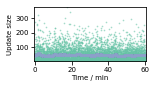

In [11]:
agent3.runRat(trainTime=60)
plotter3 = Visualiser(agent3)


0.7218765443660287


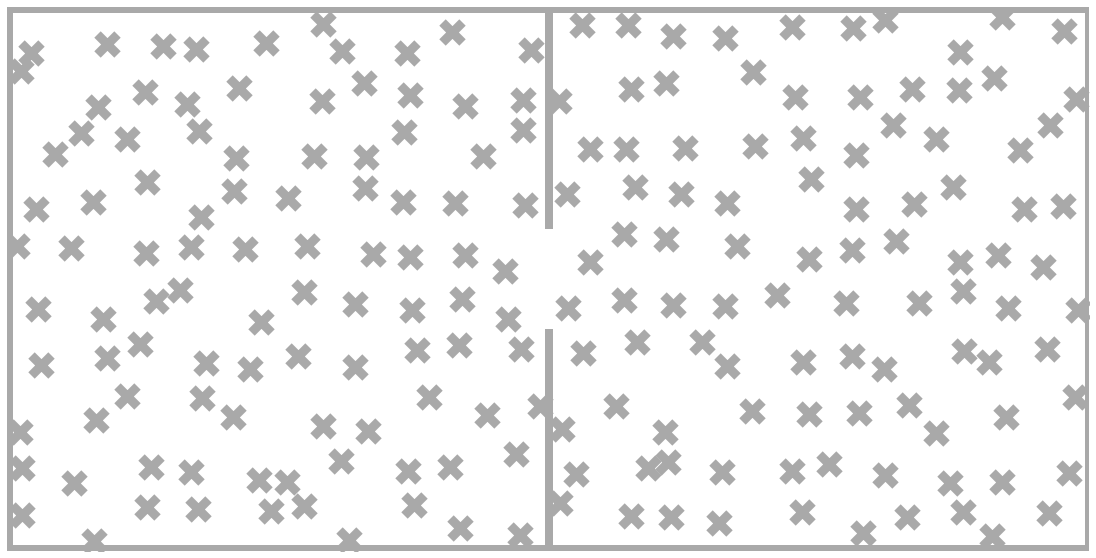

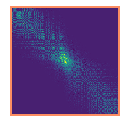

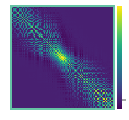

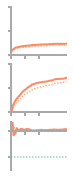

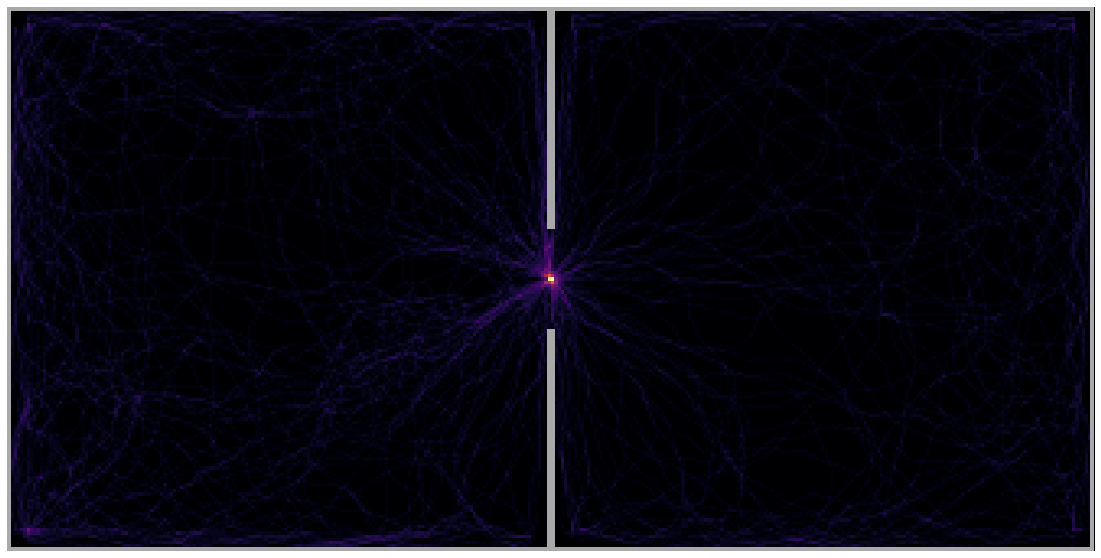

In [12]:
#FIGURE 2K
plotter3 = Visualiser(agent3)
fig, ax = plotter3.plotFeatureCells(centresOnly=True, textlabel=False)
# fig, ax  = plotter3.plotTrajectory(fig=fig, ax=ax, starttime=0, endtime=10)
saveFigure(fig, 'twoRoom',specialLocation="../figures/paperFigures/figure2/2K.svg")

#FIGURE 2L
fig, ax = plotter3.plotM(whichM='W',colorbar=False,time=60)
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W',specialLocation='../figures/paperFigures/figure2/2L.svg')

#FIGURE 2M
fig, ax, cb, cax = plotter3.plotM()
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C0')
    spine.set_linewidth(2)
cb.set_ticks([0])
cb.set_ticklabels([""])
cax.tick_params(color='darkgrey',width=2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'M',specialLocation='../figures/paperFigures/figure2/2M.svg')

fig, ax = plotter3.plotVarianceAndError()
saveFigure(fig,'Mvarerr',specialLocation='../figures/paperFigures/figure2/2N.svg')

plotter3.plotHeatMap()

print(R2(agent3.M,agent3.W))

Basis feature      (peak, skew) = (3.045, -0.0)
Place field        (peak, skew) = (2.615, -0.27)


KeyboardInterrupt: 

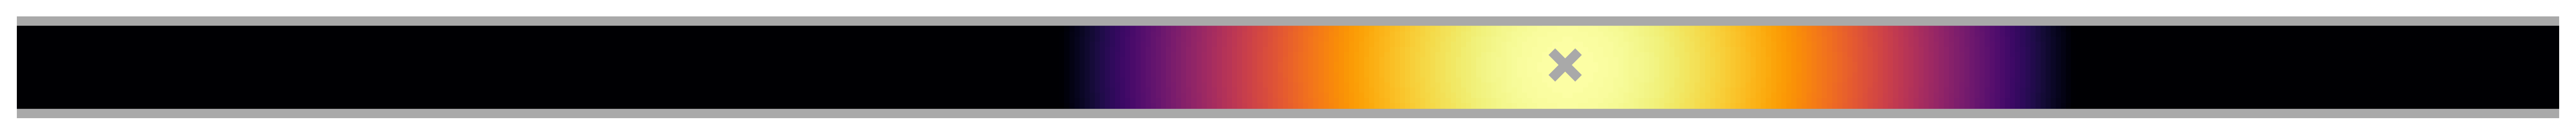

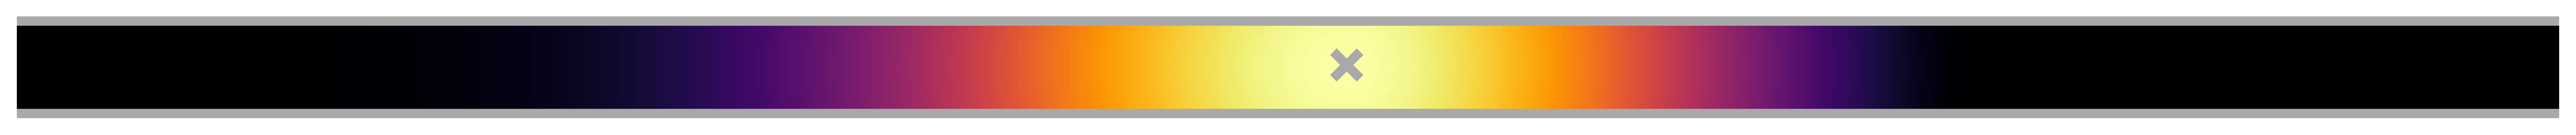

In [201]:
#FIGURE 3A
plotter = Visualiser(agent)
N = 30

fig, ax = plotter.plotReceptiveField(number=N)
saveFigure(fig,'openLoopStart',specialLocation="../figures/paperFigures/figure3/3Ai.svg")

fig, ax = plotter.plotPlaceField(time=10, number=N, STDP=True,threshold=0)
saveFigure(fig,'openLoopEnd',specialLocation="../figures/paperFigures/figure3/3Aii.svg")

placeFields = agent.getPlaceFields(M=agent.W,threshold=0)
x = agent.discreteCoords[10,:,0]
skew_PF = []
skew_RF = []
shift = []
for n in range(0,50):
    pf = placeFields[n][10,:]
    rf = agent.discreteStates[10,:,n]
    while pf[0] != 0: 
        pf = np.roll(pf,1)
        rf = np.roll(rf,1)
    peak_pf, skew_pf = getPeak(x,pf), getSkewness(x,pf)
    peak_rf, skew_rf = getPeak(x,rf), getSkewness(x,rf)
    if peak_pf > peak_rf: 
        peak_rf += agent.roomSize
    peak_shift = peak_pf - peak_rf
    shift.append(peak_shift)
    skew_PF.append(skew_pf)
    skew_RF.append(skew_rf)
print('peak shift           = %.2f +- %.2f' %(np.mean(shift),np.std(shift)))
print('receptive field skew =  %.2f +- %.2f' %(np.mean(skew_RF),np.std(skew_RF)))
print('place field skew     = %.2f +- %.2f' %(np.mean(skew_PF),np.std(skew_PF)))

N=35
y = agent.discreteStates[10,:,N]
fig, ax = plt.subplots(figsize=(2,0.5))
ax.set_xlim(0,5)
ax.fill_between(x[y>=0],y[y>=0],0,facecolor="#b93556",alpha=0.7)
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_position('zero')
ax.tick_params(width=2,color='darkgrey')
ax.set_xticks([0,2.5,5])
ax.set_yticks([])
ax.set_xticklabels(["","",""])
plt.tight_layout()
saveFigure(fig,'openLoopEnd_siderf',specialLocation="../figures/paperFigures/figure3/3Aiii.svg")



y = placeFields[N][10,:]
y /= np.trapz(y,x)
y2 = agent.getPlaceFields(M=agent.M,threshold=0)[N][10,:]
y2 /= np.trapz(y2,x)
print(R2(y,y2))
fig, ax = plt.subplots(figsize=(2,0.5))
ax.set_xlim(0,5)
ax.fill_between(x[y2>=0],y2[y2>=0],0,facecolor="C0",alpha=0.5)
ax.fill_between(x[y>=0],y[y>=0],0,facecolor="C1",alpha=0.5)
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_position('zero')
ax.tick_params(width=2,color='darkgrey')
ax.set_xticks([0,2.5,5])
ax.set_yticks([])
ax.set_xticklabels(["","",""])
plt.tight_layout()
saveFigure(fig,'openLoopEnd_sidepf',specialLocation="../figures/paperFigures/figure3/3Aiv.svg")



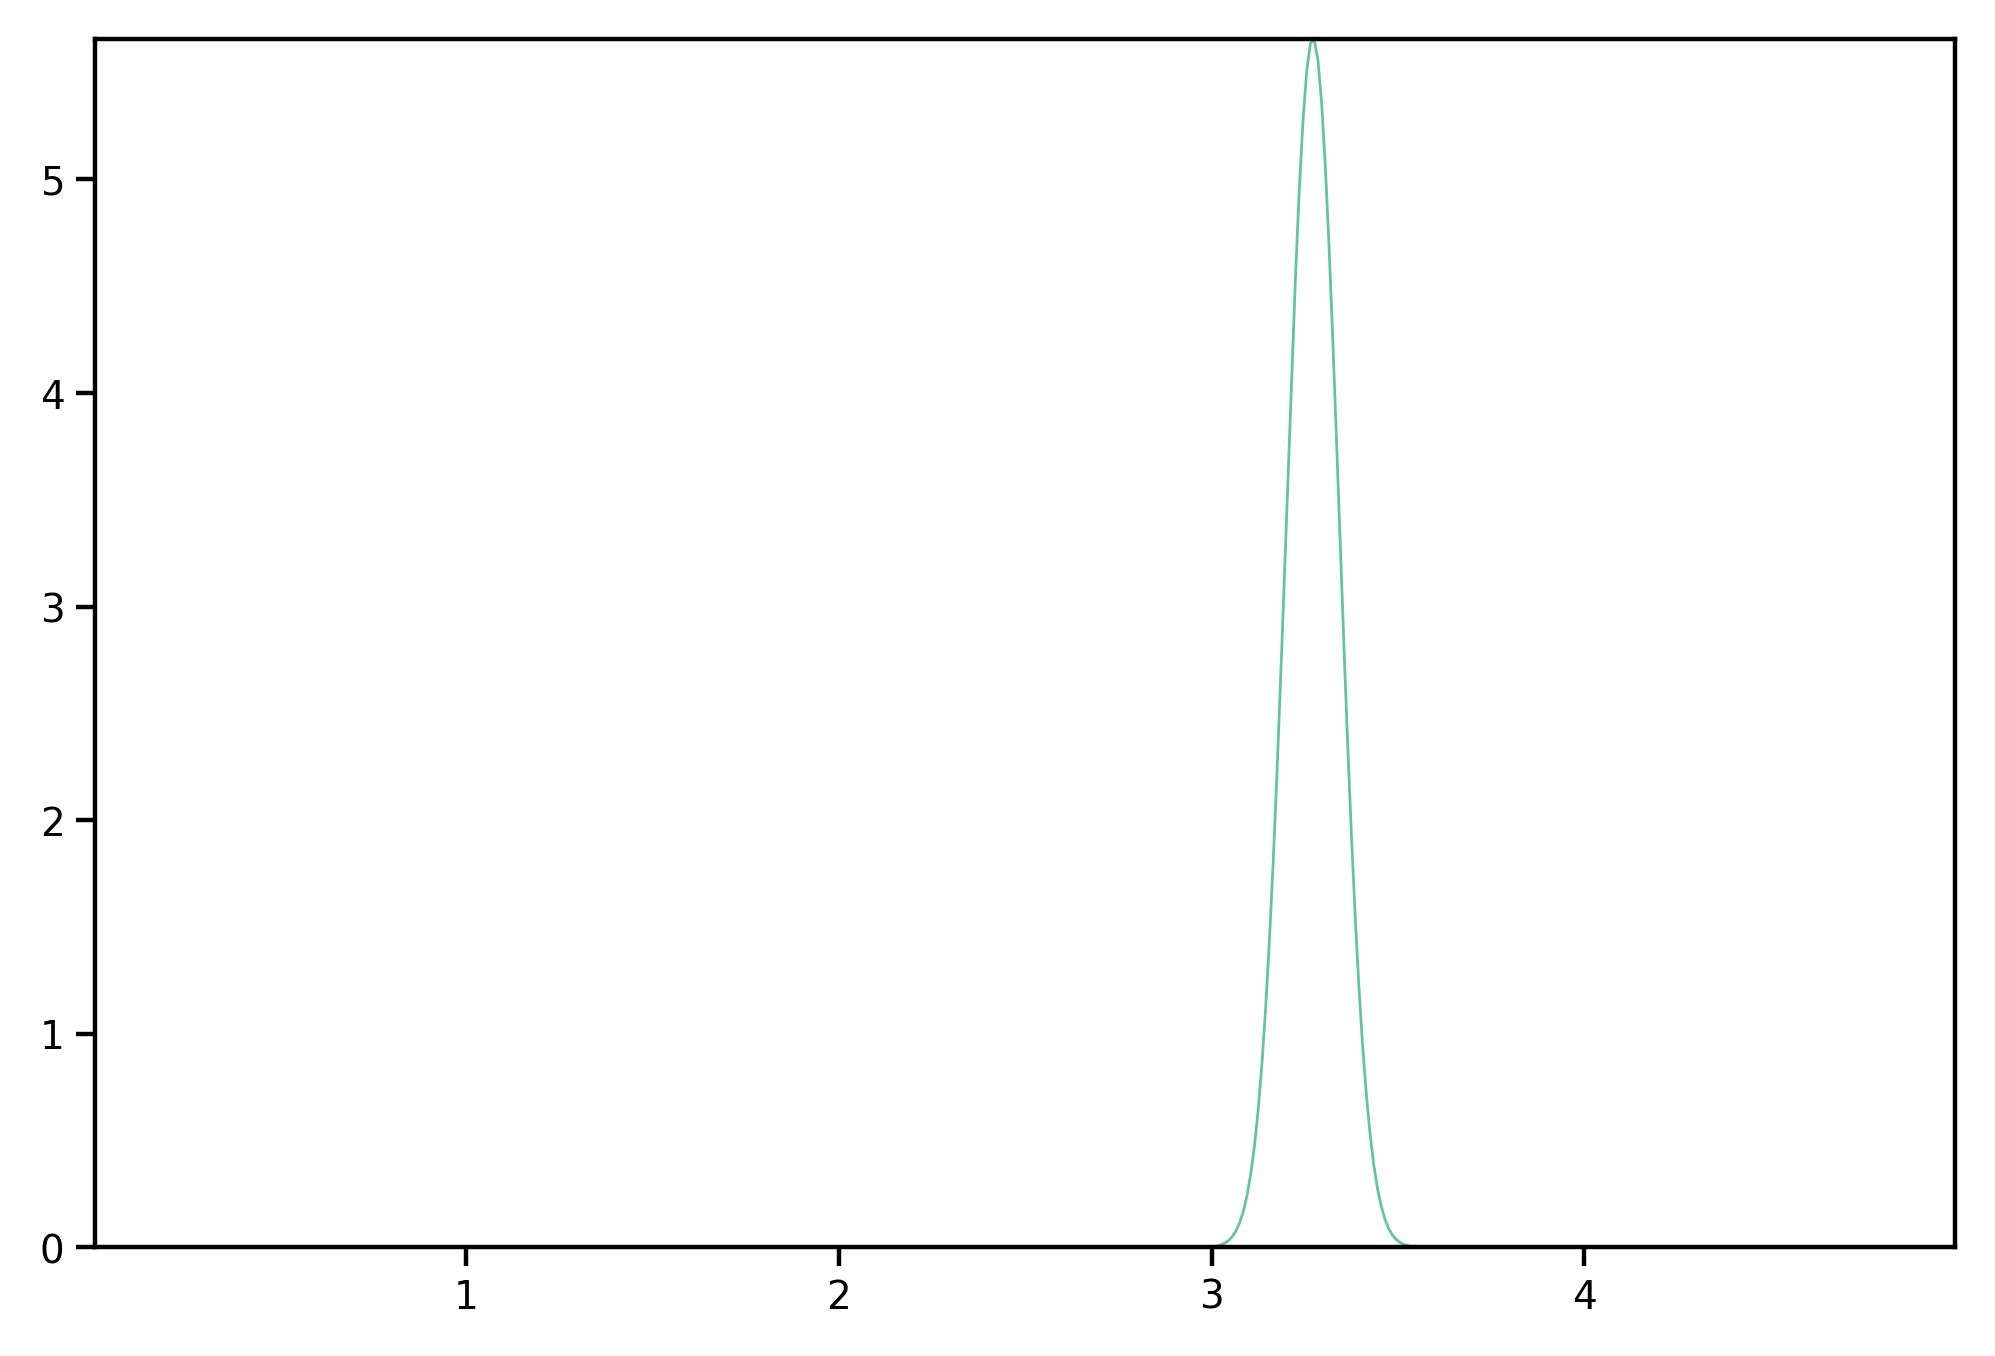

In [64]:
plt.plot(x,scipy.stats.skewnorm.pdf(x,a,loc,scale))

Basis feature      (peak, skew) = (3.545, -0.0)
Place field        (peak, skew) = (3.525, -0.17)
peak shift           = -1.92 +- 2.33
receptive field skew =  -0.00 +- 0.16
place field skew     = 0.02 +- 0.35
0.9907664197805465


'../figures/211014/closedLoopEnd_sidepf_1740'

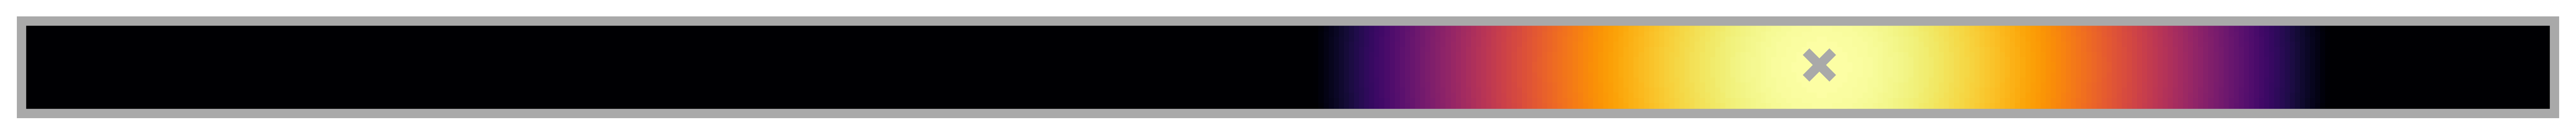

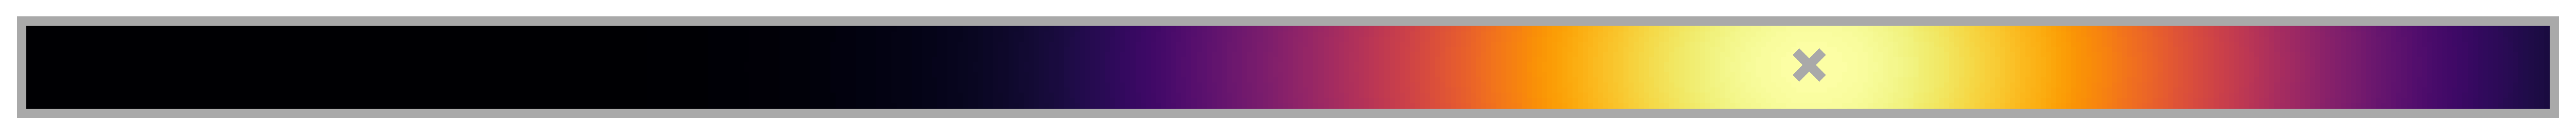

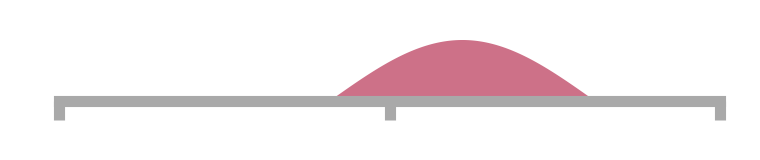

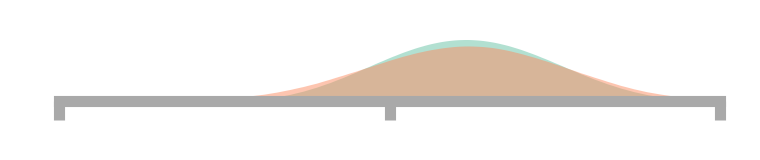

In [164]:
#FIGURE 3B
plotter2 = Visualiser(agent2)
N = 30


fig, ax = plotter2.plotReceptiveField(number=N)
saveFigure(fig,'closedLoopStart',specialLocation="../figures/paperFigures/figure3/3Bi.svg")

fig, ax = plotter2.plotPlaceField(time=30, number=N, STDP=True,threshold=0)
saveFigure(fig,'closedLoopEnd',specialLocation="../figures/paperFigures/figure3/3Bii.svg")

placeFields = agent2.getPlaceFields(M=agent2.W,threshold=0)
x = agent2.discreteCoords[10,:,0]
skew_PF = []
skew_RF = []
shift = []
for n in range(0,50):
    pf = placeFields[n][10,:]
    rf = agent2.discreteStates[10,:,n]
    peak_pf, skew_pf = getPeak(x,pf), getSkewness(x,pf)
    peak_rf, skew_rf = getPeak(x,rf), getSkewness(x,rf)
    if peak_pf > peak_rf: 
        peak_rf += agent2.roomSize
    peak_shift = peak_pf - peak_rf
    shift.append(peak_shift)
    skew_PF.append(skew_pf)
    skew_RF.append(skew_rf)
print('peak shift           = %.2f +- %.2f' %(np.mean(shift),np.std(shift)))
print('receptive field skew =  %.2f +- %.2f' %(np.mean(skew_RF),np.std(skew_RF)))
print('place field skew     = %.2f +- %.2f' %(np.mean(skew_PF),np.std(skew_PF)))


N = 30
y = agent2.discreteStates[10,:,N]
fig, ax = plt.subplots(figsize=(2,0.5))
ax.set_xlim(0,5)
ax.fill_between(x[y>=0],y[y>=0],0,facecolor="#b93556",alpha=0.7)
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_position('zero')
ax.tick_params(width=2,color='darkgrey')
ax.set_xticks([0,2.5,5])
ax.set_yticks([])
ax.set_xticklabels(["","",""])
plt.tight_layout()
saveFigure(fig,'closedLoopEnd_siderf',specialLocation="../figures/paperFigures/figure3/3Biii.svg")



y = placeFields[N][10,:]
y /= np.trapz(y,x)
y2 = agent2.getPlaceFields(M=agent2.M,threshold=0)[N][10,:]
y2 /= np.trapz(y2,x)
print(R2(y,y2))
fig, ax = plt.subplots(figsize=(2,0.5))
ax.set_xlim(0,5)
ax.fill_between(x[y2>=0],y2[y2>=0],0,facecolor="C0",alpha=0.5)
ax.fill_between(x[y>=0],y[y>=0],0,facecolor="C1",alpha=0.5)
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_position('zero')
ax.tick_params(width=2,color='darkgrey')
ax.set_xticks([0,2.5,5])
ax.set_yticks([])
ax.set_xticklabels(["","",""])
plt.tight_layout()
saveFigure(fig,'closedLoopEnd_sidepf',specialLocation="../figures/paperFigures/figure3/3Biv.svg")

Eccentricity = 0.009
(200, 167, 334)
Eccentricity = 0.644
wall cells, eccentricity    =  0.57 +- 0.07  (N=24) 
centre cells, eccentricity  =  0.43 +- 0.10  (N=32) 
z = 5.994 --> p = 0.00000000


/Users/tomgeorge/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


'../figures/211013/eccentricityBoxplot_0103'

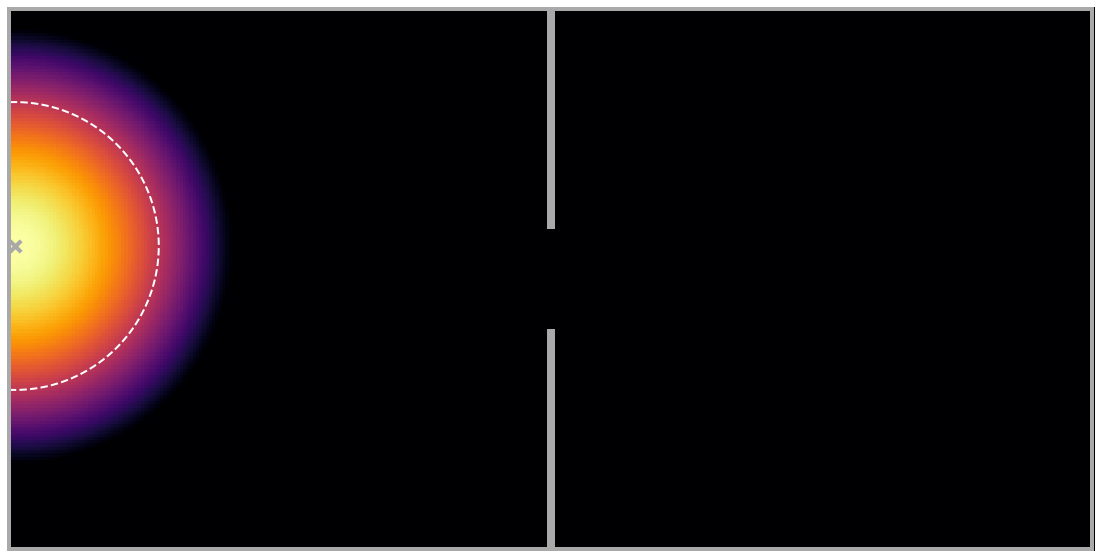

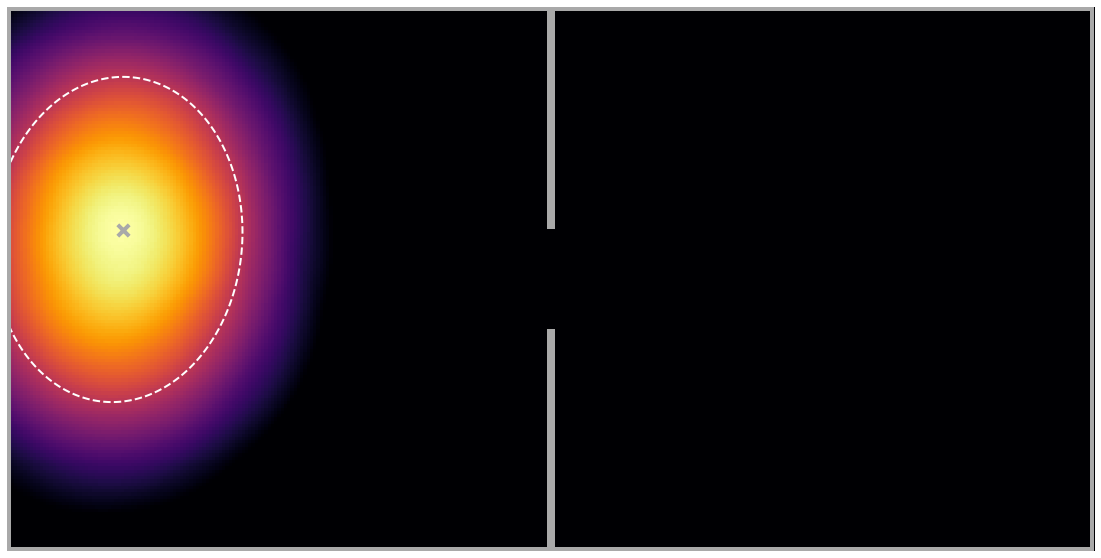

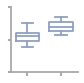

In [15]:
#FIGURE 3C
plotter3 = Visualiser(agent3)
#find cell near wall
cellID = np.argmin(np.linalg.norm(agent3.centres - np.array([0,1.25]),axis=1))


fig, ax = plotter3.plotReceptiveField(number=cellID, fitEllipse_=True)
saveFigure(fig,'2DMazeSideStart',specialLocation="../figures/paperFigures/figure3/3Ci.svg")

fig, ax = plotter3.plotPlaceField(number=cellID, STDP=True,fitEllipse_=True,threshold=0.2)
saveFigure(fig,'2DMazeSideEnd',specialLocation="../figures/paperFigures/figure3/3Cii.svg")

if True:
    placeFields = agent3.getPlaceFields(M=agent3.W,threshold=0.5)
    coords = agent3.discreteCoords
    eccen_wall = []
    eccen_centre = []
    for i in range(agent3.nCells):
    # for i in range(10):
        x,y = agent3.centres[i][0],agent3.centres[i][1] 
        if ((0.75 < x < 1.75) or (3.25 < x < 4.25)) and (0.75 < y < 1.75): 
            (X,Y,Z),e = fitEllipse(placeFields[i],coords=coords,verbose=False)
            eccen_centre.append(e)
        # else:
        elif ((((x < 0.25) or (x > 4.75)) and (0.75 < y < 1.75)) or 
              (((0.75 < x < 1.75) or (3.25 < x < 4.25)) and ((y < 0.25) or (y > 2.25)))):
            (X,Y,Z),e = fitEllipse(placeFields[i],coords=coords,verbose=False)
            eccen_wall.append(e)


    z = (np.mean(eccen_wall) - np.mean(eccen_centre))/np.sqrt(np.std(eccen_wall)**2/len(eccen_wall) + np.std(eccen_centre)**2/len(eccen_centre))
    # z = (np.mean(eccen_wall) - np.mean(eccen_centre))/np.sqrt(np.std(eccen_wall)**2/ + np.std(eccen_centre)**2)
    p = scipy.stats.norm.sf(z) #one-sided  
    
    print("wall cells, eccentricity    =  %.2f +- %.2f  (N=%g) " %(np.mean(eccen_wall),np.std(eccen_wall),len(eccen_wall)))
    print("centre cells, eccentricity  =  %.2f +- %.2f  (N=%g) " %(np.mean(eccen_centre),np.std(eccen_centre),len(eccen_centre)))
    print("z = %.3f --> p = %.8f" %(z,p))

fig, ax = plt.subplots(figsize=(1.2,1.2))
bp = ax.boxplot([eccen_centre,eccen_wall],positions = [0.1,0.3],showfliers=False,widths=0.14)
for element in ['boxes', 'whiskers', 'means', 'medians', 'caps']:
    plt.setp(bp[element], color='C2',linewidth=1.8)

for patch in bp['boxes']:
    patch.set(color='C2',linewidth=1.8)    

ax.set_ylim([0,0.8])
ax.set_xlim([0,0.4])
ax.spines['left'].set_position('zero')
ax.spines['left'].set_color('darkgrey')
ax.spines['left'].set_linewidth(1.8)
ax.spines['right'].set_color('none')        
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['bottom'].set_linewidth(1.8)
ax.spines['top'].set_color('none')
ax.set_yticks([0,0.4,0.8])
ax.set_yticklabels(['','',''])
ax.set_xticks([0.1,0.3])
ax.set_xticklabels(['',''])
ax.tick_params(width=2,color='darkgrey')

saveFigure(fig,'eccentricityBoxplot',specialLocation="../figures/paperFigures/figure3/3Cii_inset.svg")




(200, 167, 334)


'../figures/211013/2DMazeDoorCreepEnd_1553'

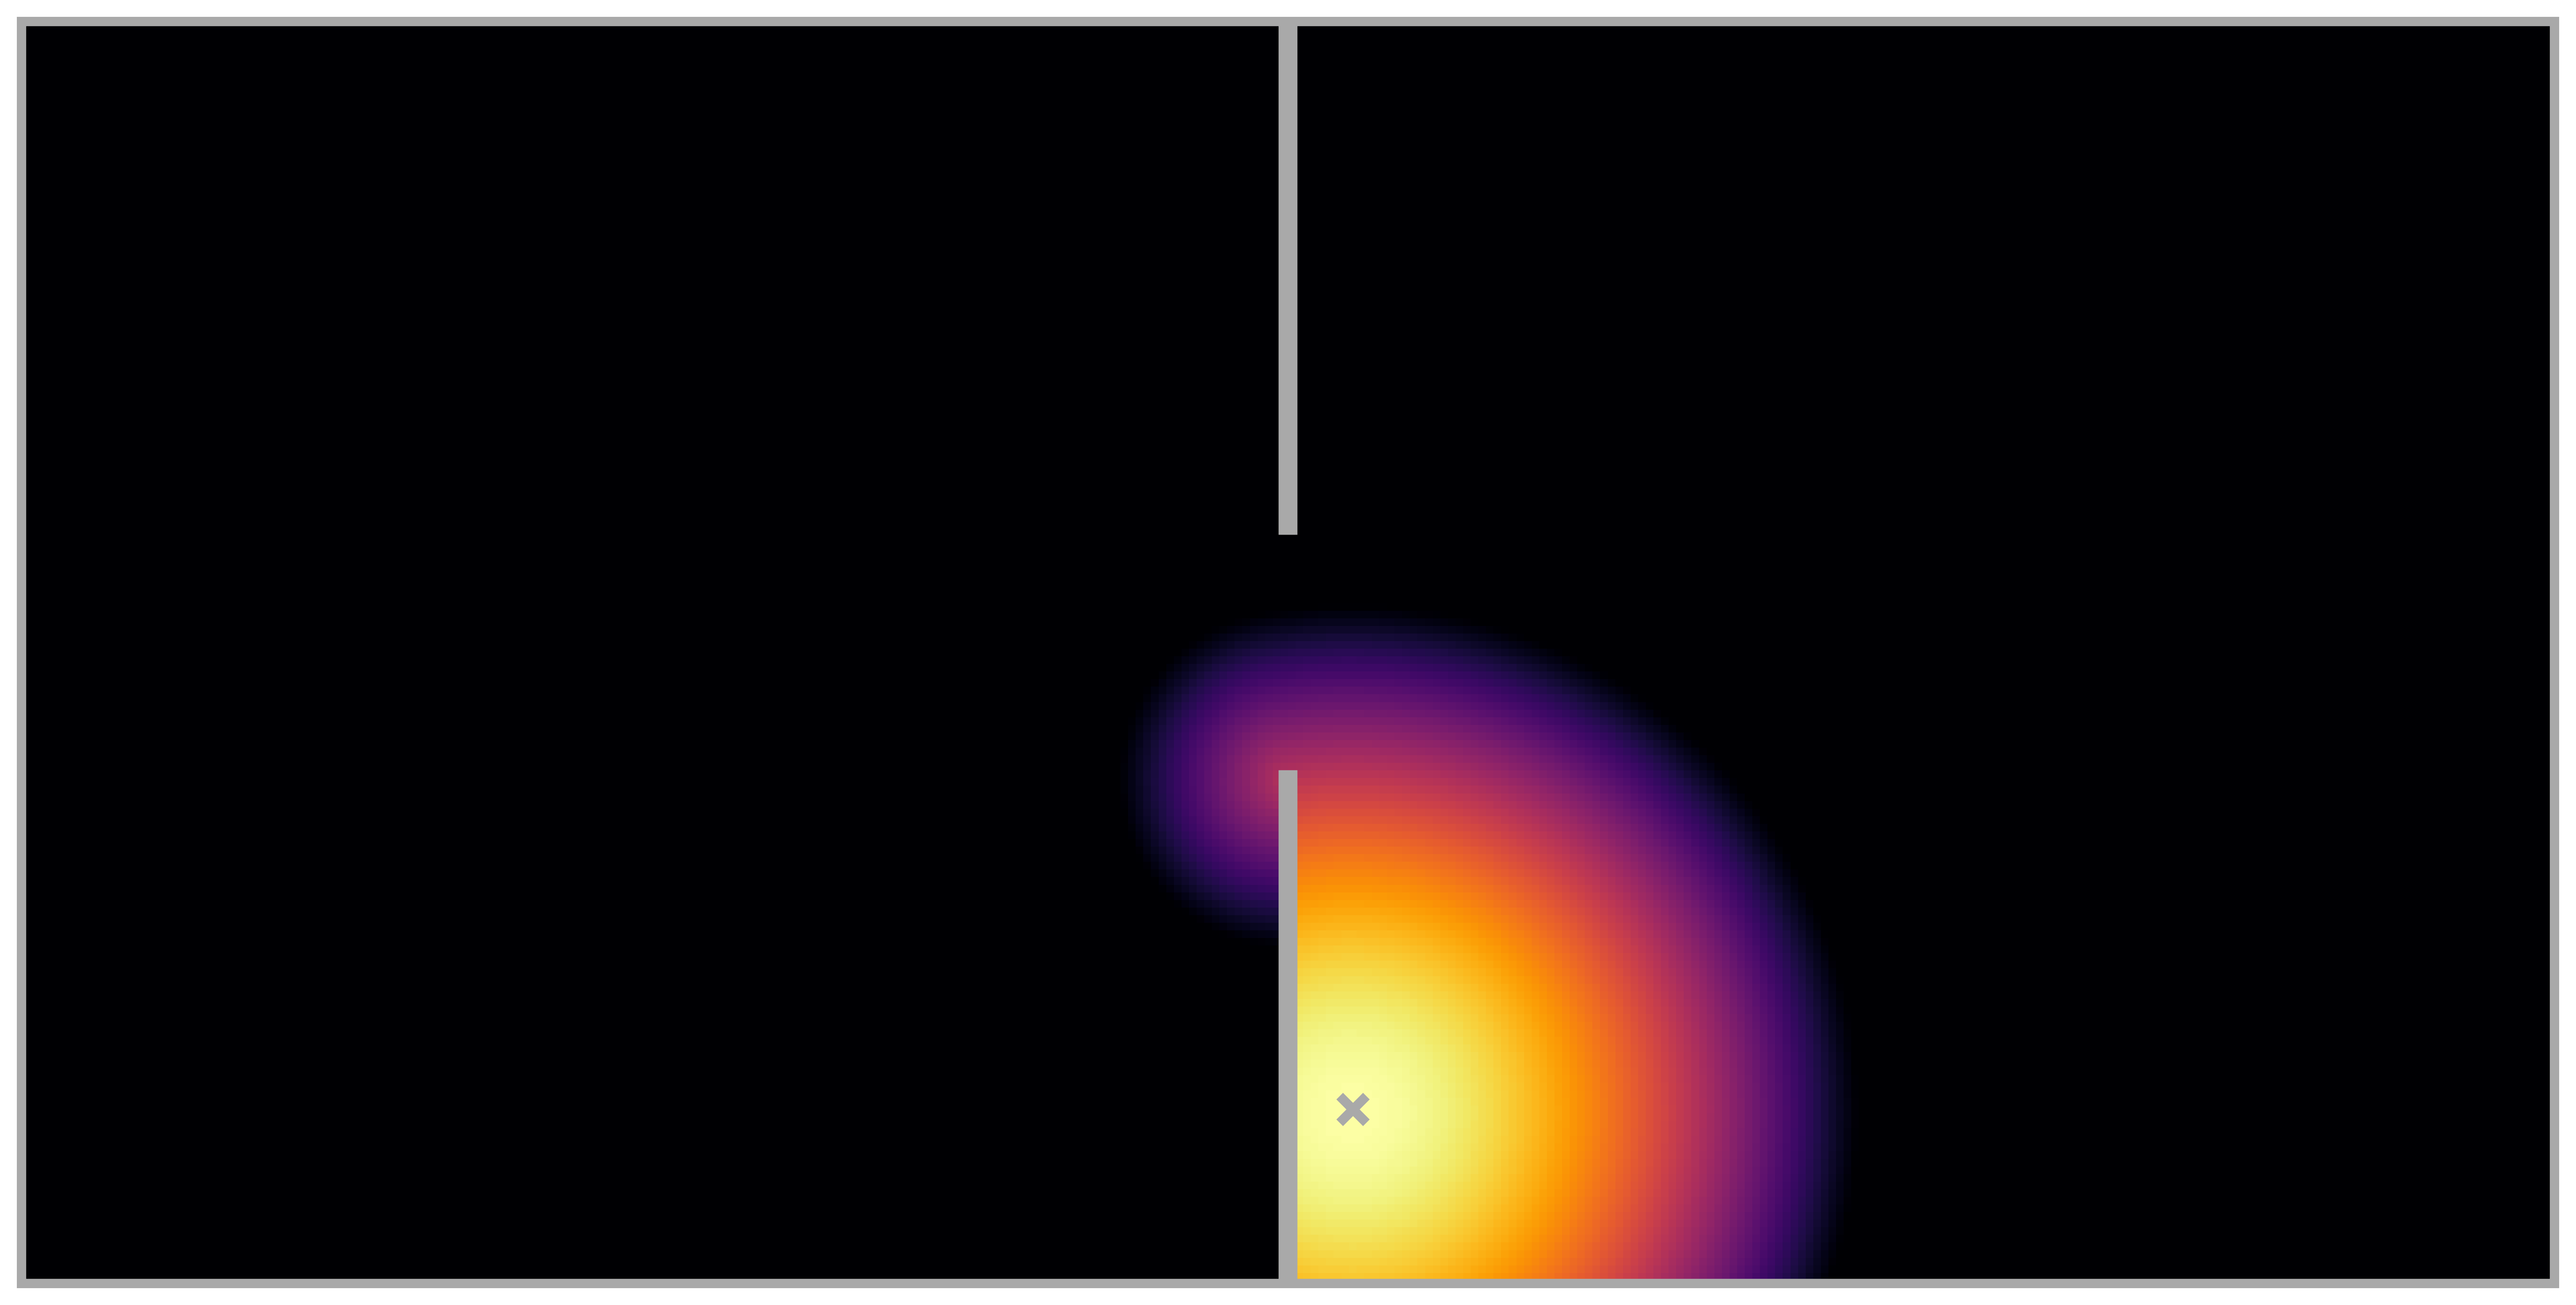

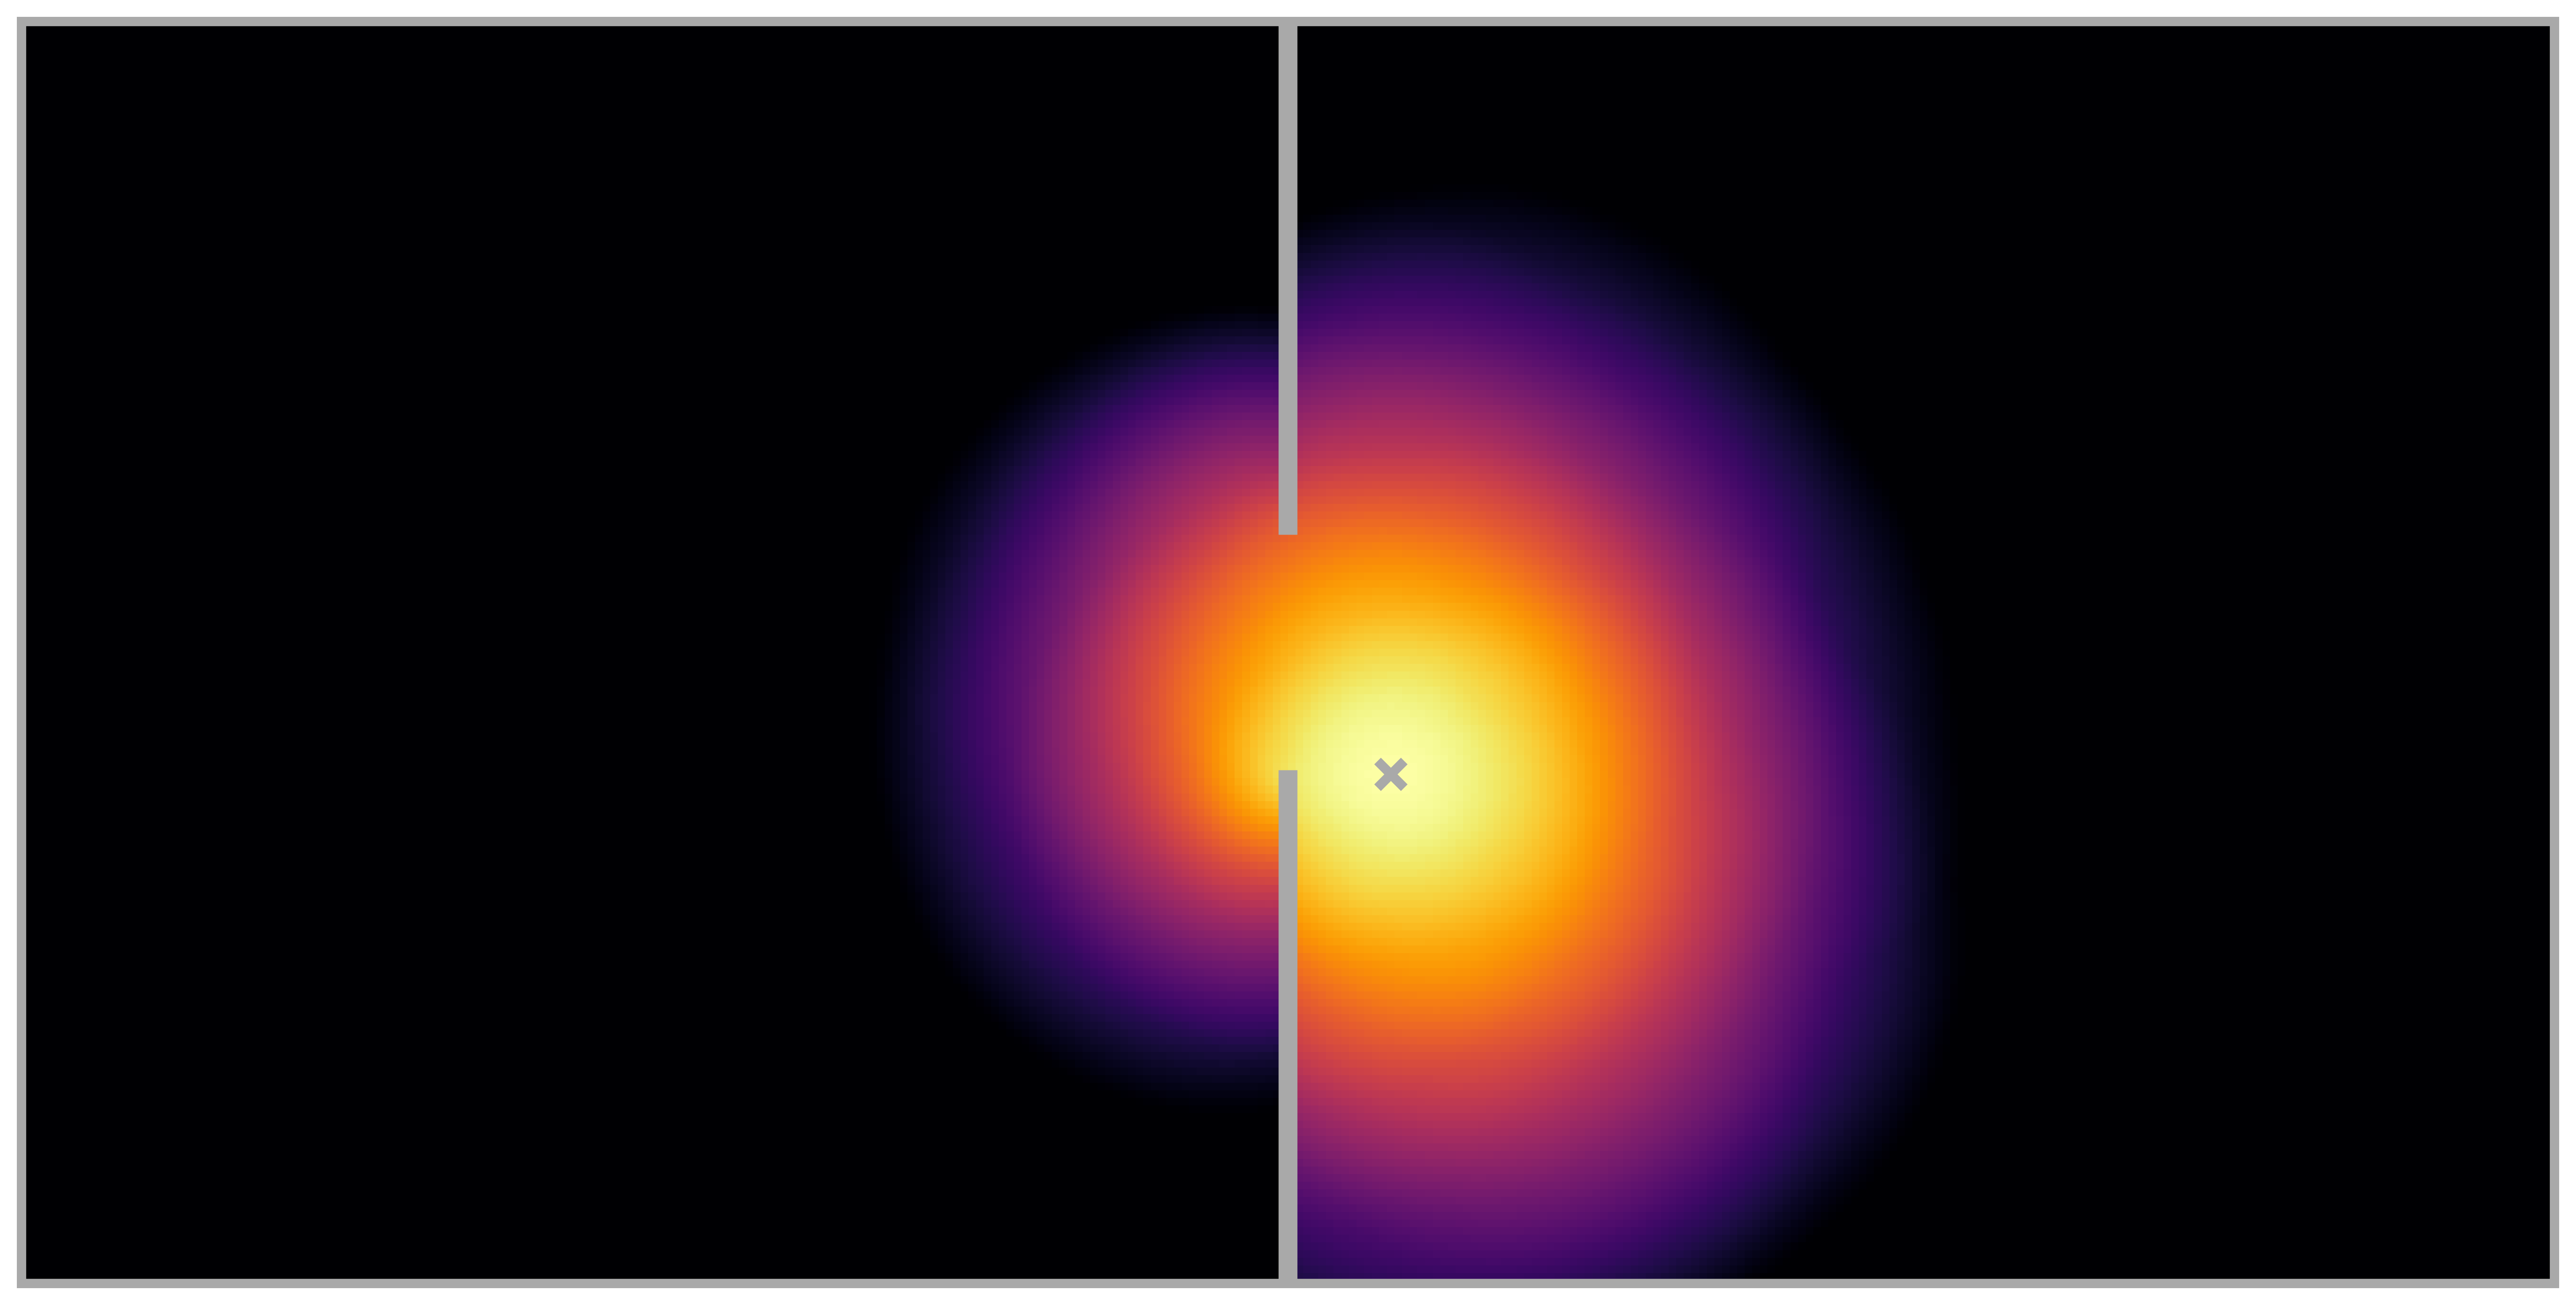

In [42]:
#FIGURE 3D
plotter3 = Visualiser(agent3)
#find cell just behind wall
cellID = np.argmin(np.linalg.norm(agent3.centres - np.array([2.6,0.4]),axis=1))

fig, ax = plotter3.plotReceptiveField(number=cellID)
saveFigure(fig,'2DMazeDoorCreepStart',specialLocation="../figures/paperFigures/figure3/3Di.svg")

fig, ax = plotter3.plotPlaceField(time=30, number=cellID, STDP=True,threshold=0.2)
saveFigure(fig,'2DMazeDoorCreepEnd',specialLocation="../figures/paperFigures/figure3/3Dii.svg")

In [43]:
N=50
xcen = np.linspace(0,5,N+1)[:-1]
xcen += (xcen[1] - xcen[0]) / 2
ycen = np.array([0.1]*N)
centres = np.vstack((xcen,ycen)).T
centres = np.vstack((centres,centres,centres))
sigmas = np.array([0.5]*N  + [1]*N + [1.5]*N)

#Default parameters for MazeAgent 
params4 = { 

          #Maze params 
          'mazeType'            : 'loop',  #type of maze, define in getMaze() function
          'stateType'           : 'gaussianThreshold', #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
          'movementPolicy'      : 'windowsScreensaver',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'            : 5,          #maze size scaling parameter, metres
          'dt'                  : 0.005,       #simulation time disretisation 
          'dx'                  : 0.01,       #space discretisation (for plotting, movement is continuous)
          'centres'             : centres,       #array of receptive field positions. Overwrites nCells
          'sigma'               : sigmas,          #basis cell width scale (irrelevant for onehots)
          'doorsClosed'         : False,       #whether doors are opened or closed in multicompartment maze
          'reorderCells'        : False,
          #TD params 
          'tau'                 : 4,          #TD decay time, seconds
          'TDdx'                : 0.01,       #rough distance between TD learning updates, metres 
          'alpha'               : 0.01,       #TD learning rate 
          'successorFeatureNorm': 100,        #linear scaling on successor feature definition found to improve learning stability
          'TDreg'               : 0.01,       #L2 regularisation 
          
          #STDP params
          'peakFiringRate'      : 5,          #peak firing rate of a cell (middle of place field, preferred theta phase)
          'tau_STDP_plus'       : 20e-3,      #pre trace decay time
          'tau_STDP_minus'      : 40e-3,      #post trace decay time
          'a_STDP'              : -0.4,       #pre-before-post potentiation factor (post-before-pre = 1) 
          'eta'                 : 0.05,       #STDP learning rate
          'baselineFiringRate'  : 0,          #baseline firing rate for cells 


          #Theta precession params
          'thetaFreq'           : 10,         #theta frequency
          'precessFraction'     : 0.6,        #fraction of 2pi the prefered phase moves through
          'kappa'               : 1,          # von mises spread parameter
          }


agent4 =  MazeAgent(params4)



Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/10000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces
DONE


'../figures/211013/openloop_threetypes_1556'

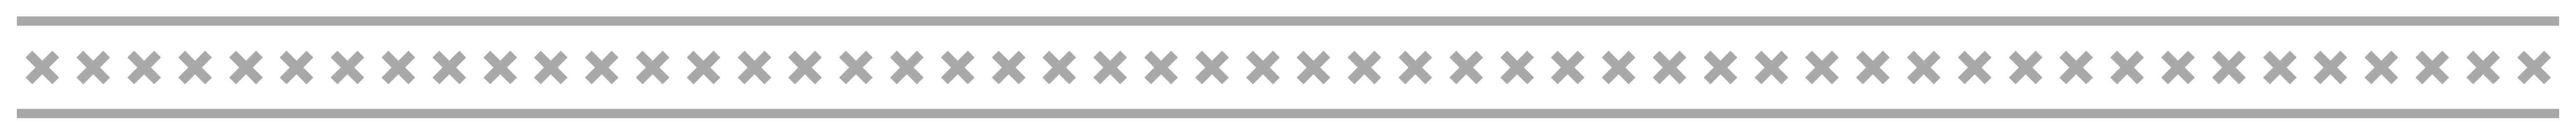

In [44]:
#FIGURE 4A 
plotter4 = Visualiser(agent4)
fig, ax = plotter4.plotFeatureCells(centresOnly=True, textlabel=False,threetypes=False)
saveFigure(fig,'openloop_threetypes',specialLocation="../figures/paperFigures/figure4/4C.svg")

  0%|          | 0/360000 [00:00<?, ?it/s]

Calculating place and grid cells


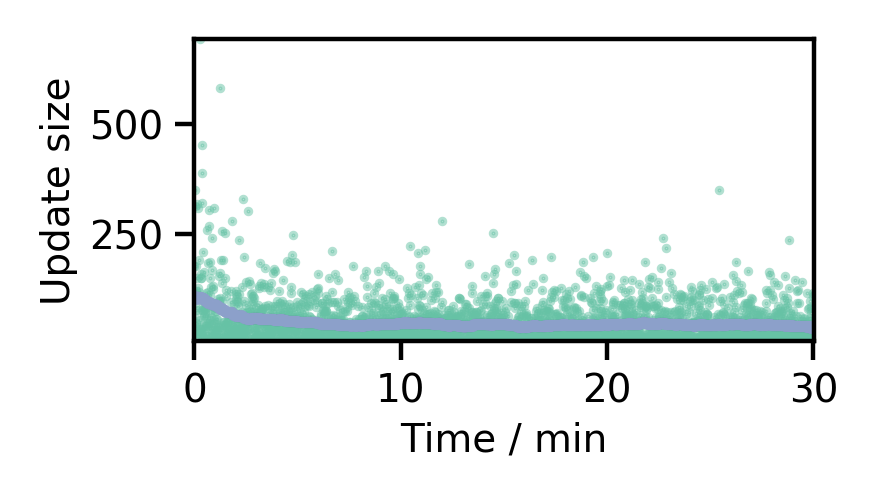

In [45]:
agent4.runRat(trainTime=30,saveEvery=0.5)
plotter4 = Visualiser(agent4)

In [26]:
import time 

overwrite = True

if overwrite == True:
    for i in range(10):
        print("WARNING! Overwriting in %g s" %(10-i)) 
        time.sleep(1) 
    pickleAndSave(agent,"openLoop")
    pickleAndSave(agent2,"closedLoop")
    pickleAndSave(agent3,"twoRooms")
    pickleAndSave(agent4,"multiscale")

WARNING! Overwriting in 10 s
WARNING! Overwriting in 9 s
WARNING! Overwriting in 8 s
WARNING! Overwriting in 7 s
WARNING! Overwriting in 6 s
WARNING! Overwriting in 5 s
WARNING! Overwriting in 4 s
WARNING! Overwriting in 3 s
WARNING! Overwriting in 2 s
WARNING! Overwriting in 1 s


In [3]:
loadfromsave = True
if loadfromsave == True:
    agent = loadAndDepickle("openLoop")
    agent2 = loadAndDepickle("closedLoop")
    agent3 = loadAndDepickle("twoRooms")
    agent4 = loadAndDepickle("multiscale")


'../figures/211014/W_onDiag_1455'

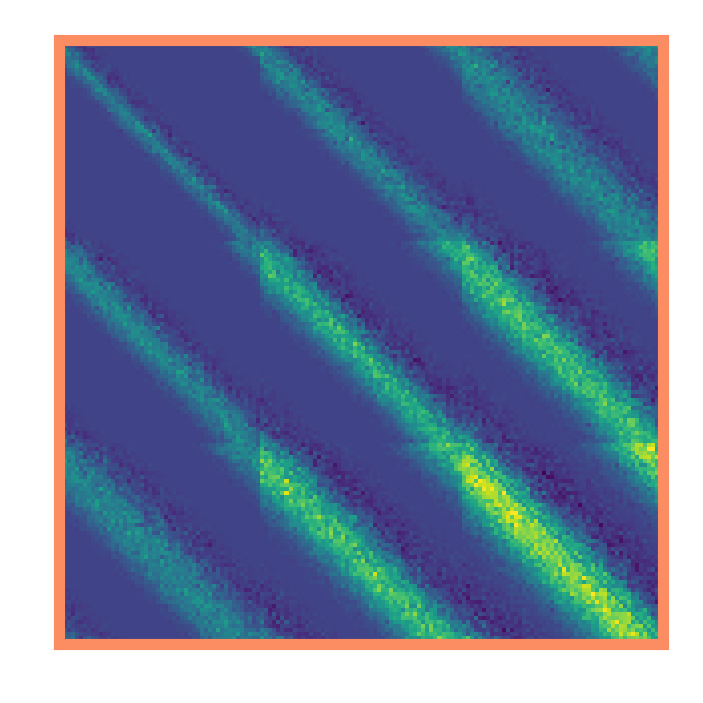

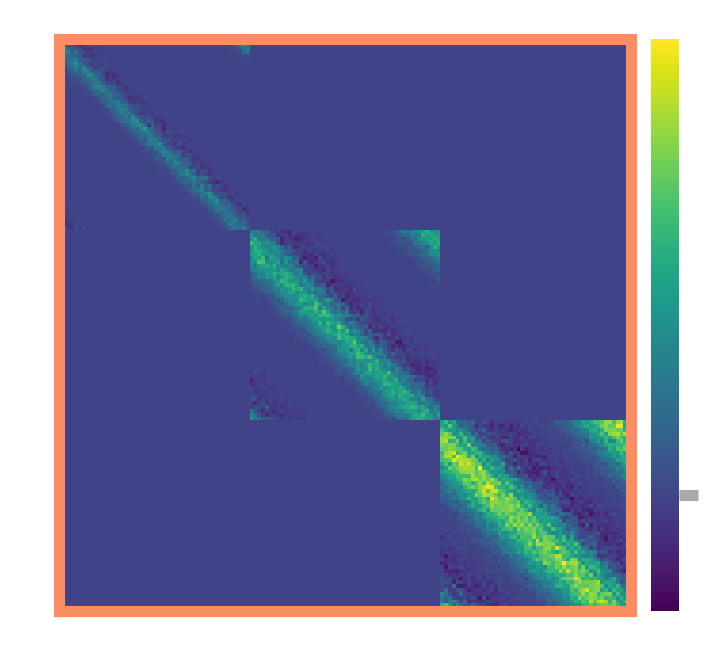

In [98]:
W_onDiag = agent4.W.copy()
for i in range(agent4.nCells):
    for j in range(agent4.nCells):
        if i < 50: 
            if j >= 50: 
                W_onDiag[i,j] = 0 
        elif 50 <= i < 100:
            if j < 50 or j >= 100: 
                W_onDiag[i,j] = 0 
        elif i >= 100: 
            if j < 100: 
                W_onDiag[i,j] = 0

agent4.W_onDiag = W_onDiag
plotter4 = Visualiser(agent4)



fig, ax = plotter4.plotM(M=agent4.W,colorbar=False,colormatchto='W_onDiag')
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W',specialLocation='../figures/paperFigures/figure4/4D.svg')

fig, ax, cb, cax = plotter4.plotM(M=agent4.W_onDiag,colorbar=True,colormatchto='W_onDiag')
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
ax.set_xticks([])
ax.set_yticks([])
cb.set_ticks([0])
cb.set_ticklabels([""])
cax.tick_params(color='darkgrey',width=2)
saveFigure(fig,'W_onDiag',specialLocation='../figures/paperFigures/figure4/4F.svg')


# #FIGURE 2M
# fig, ax, cb, cax = plotter4.plotM()
# ax.axis('on')
# for spine in ax.spines.values():
#     spine.set_color('C0')
#     spine.set_linewidth(2)
# cb.set_ticks([0])
# cb.set_ticklabels([""])
# cax.tick_params(color='darkgrey',width=2)
# ax.set_xticks([])
# ax.set_yticks([])
# saveFigure(fig,'M',specialLocation='../figures/paperFigures/figure4/4E.svg')

(150, 20, 500)
Place field     (peak, mean, std, skew) = (2.345, 2.31, 0.269, -0.243)
(150, 20, 500)
Place field     (peak, mean, std, skew) = (2.185, 2.146, 0.56, -0.115)
(150, 20, 500)
Place field     (peak, mean, std, skew) = (1.985, 1.933, 0.792, 0.037)
(150, 20, 500)
Place field     (peak, mean, std, skew) = (2.275, 2.162, 0.7, -0.112)
(150, 20, 500)
Place field     (peak, mean, std, skew) = (2.175, 2.087, 0.714, -0.099)
(150, 20, 500)
Place field     (peak, mean, std, skew) = (2.025, 1.958, 0.729, -0.09)


'../figures/211013/pc_large_1604_1'

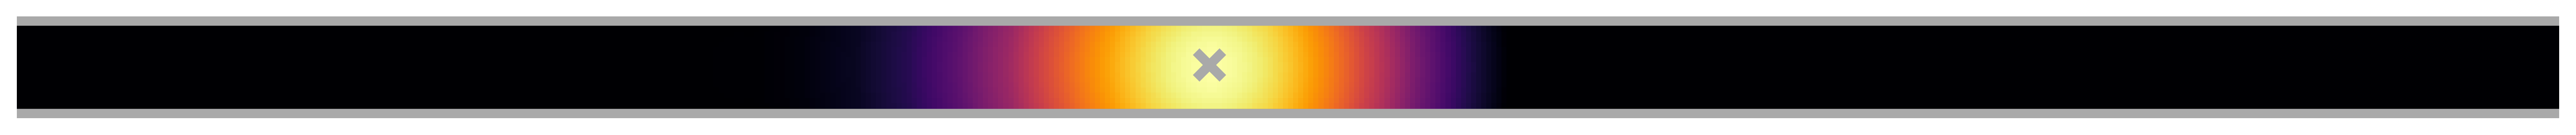

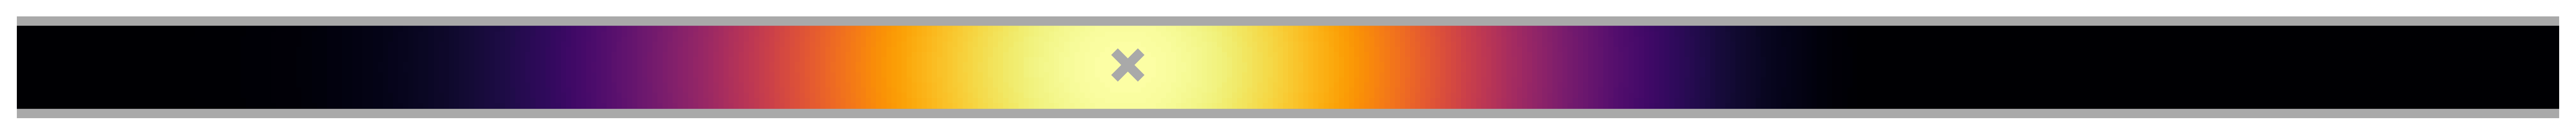

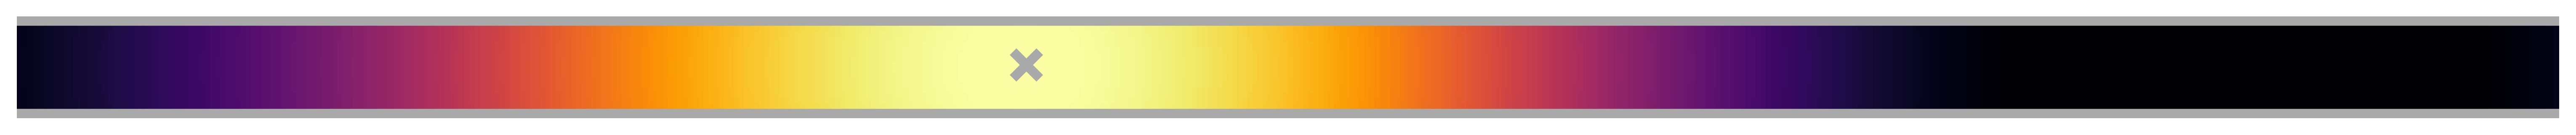

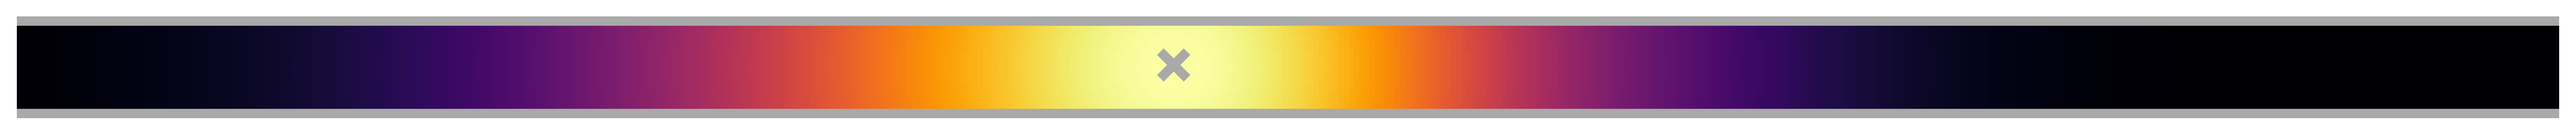

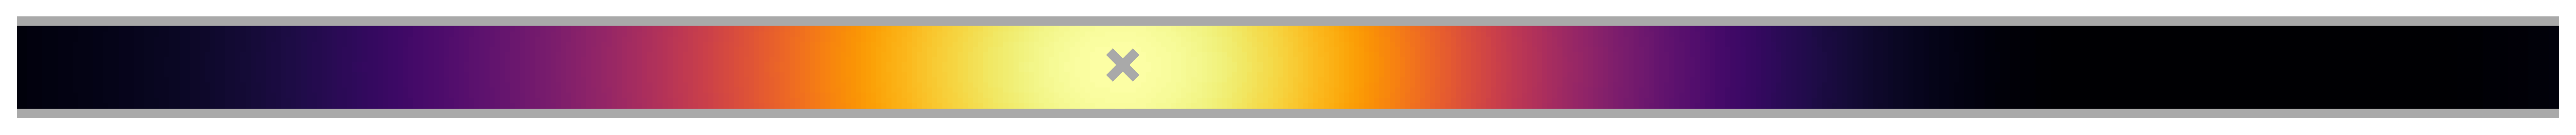

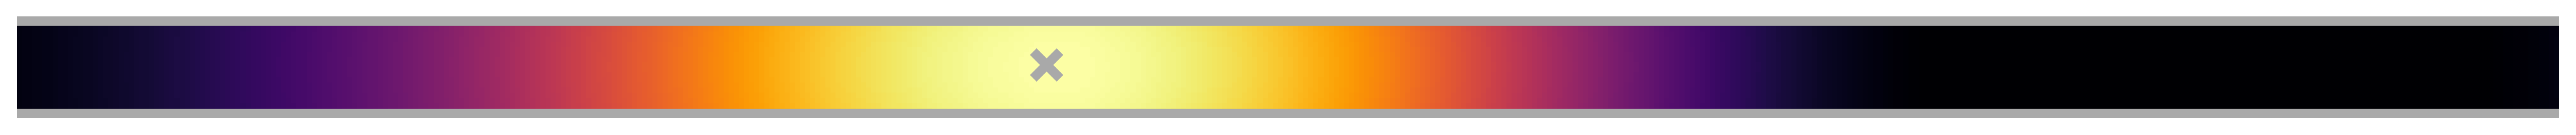

In [47]:
N = [25,75,125]

fig, ax = plotter4.plotPlaceField(number=25, M=agent4.W_onDiag,threshold=0)
saveFigure(fig,'pc_small',specialLocation="../figures/paperFigures/figure4/4ei.svg")

fig, ax = plotter4.plotPlaceField(number=75, M=agent4.W_onDiag,threshold=0)
saveFigure(fig,'pc_medium',specialLocation="../figures/paperFigures/figure4/4eii.svg")

fig, ax = plotter4.plotPlaceField(number=125, M=agent4.W_onDiag,threshold=0)
saveFigure(fig,'pc_large',specialLocation="../figures/paperFigures/figure4/4eiii.svg")

fig, ax = plotter4.plotPlaceField(number=25, M=agent4.W,threshold=0)
saveFigure(fig,'pc_small',specialLocation="../figures/paperFigures/figure4/4gi.svg")

fig, ax = plotter4.plotPlaceField(number=75, M=agent4.W,threshold=0)
saveFigure(fig,'pc_medium',specialLocation="../figures/paperFigures/figure4/4gii.svg")

fig, ax = plotter4.plotPlaceField(number=125, M=agent4.W,threshold=0)
saveFigure(fig,'pc_large',specialLocation="../figures/paperFigures/figure4/4giii.svg")


In [ ]:
#FIGURE 4A
N=50
loopsize=5
xcen = np.linspace(0,loopsize,N+1)[:-1]
xcen += (xcen[1] - xcen[0]) / 2
ycen = np.array([0.1]*N)
centres = np.vstack((xcen,ycen)).T

sigmas = [0.25,0.5,0.75,1,1.25,1.5,1.75,2]
w_bank = np.zeros(shape=(len(sigmas),N,N))

for (i, sigma) in enumerate(sigmas):
    parameters = {
            #Maze params 
            'mazeType'            : 'loop',  #type of maze, define in getMaze() function
            'stateType'           : 'bump', #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
            'movementPolicy'      : 'windowsScreensaver',  #movement policy (raudies, random walk, windows screensaver)
            'roomSize'            : loopsize,          #maze size scaling parameter, metres
            'dt'                  : 0.005,       #simulation time disretisation 
            'centres'             : centres,       #array of receptive field positions. Overwrites nCells
            'sigma'               : sigma,          #basis cell width scale (irrelevant for onehots)
            'doorsClosed'         : False,       #whether doors are opened or closed in multicompartment maze
            #TD params 
            'tau'                 : 3,          #TD decay time, seconds
            'TDdx'                : 0.01,       #rough distance between TD learning updates, metres 
            'alpha'               : 0.01,       #TD learning rate 
            'successorFeatureNorm': 100,        #linear scaling on successor feature definition found to improve learning stability
            #STDP params
            'a_pre'               : 1,          #bump in cell 'presynaptic trace' when it spikes
            'a_post'              : 0.7,      #bump in cell 'postsynaptic trace' when it spikes
            'precessFraction'     : 1,        #fraction of 2pi the prefered phase moves through
            'peakFiringRate'      : 20,         #peak firing rate of a cell (middle of place field, preferred theta phase)
            'eta_pre'             : 0.05,        #learning rate for pre to post strengthening 
            'eta_post'            : 0.05,        #learning rate for post to pre weakening
            'kappa'               : 1,        #von mises spread parameter (smaller = wider)
            'tau_pre'             : 20e-3,      #rate potentiating trace decays
            'tau_post'            : 20e-3,      #rate depressing trace decays 
            'baselineFiringRate'  : 0
    }

    agentsigma =  MazeAgent(parameters)
    agentsigma.runRat(trainTime=10,TDSRLearn=False)
    w_bank[i] = agentsigma.W


In [ ]:
taus = np.zeros(len(sigmas))
taus_sigma = np.zeros(len(sigmas))

for (i,sigma) in enumerate(sigmas):
    t = []
    w_shifted = np.zeros_like(agentsigma.W)
    w = w_bank[i]
    for j in range(agentsigma.nCells):
        w_shifted[j,:] = np.roll(w[j,:],-j)
    w_shifted_mean = np.mean(w_shifted,axis=0)
    b = np.argmax(w_shifted_mean)
    plt.plot(w_shifted_mean)
    max_binding = w_shifted_mean[b]
    while True: 
        if w_shifted_mean[b] <= max_binding / np.e:
            t = agentsigma.nCells - b
            break
        else: 
            b -= 1 
    tau =  t * (agentsigma.roomSize / agentsigma.nCells) / (agentsigma.speedScale)
    taus[i] = tau

taus_plot = taus
taus_sigma_plot = taus_sigma
sigmas_plot = sigmas



fig, ax = plt.subplots(figsize=(2,2))
[m,c] = np.polyfit(sigmas_plot,taus_plot,deg=1)
x = np.linspace(0,sigmas_plot[-1],100)
y = m*x + c
color = ['darkgrey'] * len(sigmas)
color[1],color[3],color[5] = 'C2','#B696C7','C3'
size = [25] * len(sigmas)
ax.scatter(sigmas_plot,taus_plot,s=size,c=color)
# ax.errorbar(sigmas_plot,taus_plot,taus_sigma_plot,ls="none",c=color)
ax.plot(x,y,c='darkgrey',linestyle='--',linewidth=1)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0,right=sigmas_plot[-1]+0.1)
ax.spines['left'].set_position('zero')
ax.spines['left'].set_color('darkgrey')
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_color('none')        
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_color('none')
ax.set_xticks([0,0.5,1,1.5,2])
ax.set_xticklabels(['','','','',''])
ax.set_yticks([0,2,4,6,8,10])
ax.set_yticklabels(['','','','',''])
ax.tick_params(width=2,color='darkgrey')

saveFigure(fig,"tausigma",specialLocation="../figures/paperFigures/figure4/4A.svg")
